In [139]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
import missingno as mns
nltk.download('stopwords')
stop_words = stopwords.words('english')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from palettable.colorbrewer.qualitative import Pastel1_7
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
import os
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

[nltk_data] Downloading package stopwords to C:\Users\HP
[nltk_data]     15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [140]:
df_travel=pd.read_csv('travel insurance.csv')

In [141]:
df_travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [142]:
df_travel.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [143]:
df_travel.shape

(63326, 11)

In [144]:
df_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [145]:
df =df_travel.drop(['Gender'], axis = 1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


In [147]:
df.rename(columns={ 'Agency Type':'Agency_Type', 'Distribution Channel':'Distribution_Channel', 'Product Name':'Product_Name','Net Sales':'Net_Sales', 'Commision (in value)':'Commision'},inplace=True)
df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


In [148]:
cat = ['Agency','Agency_Type','Distribution_Channel','Product_Name','Claim','Destination']
enc = LabelEncoder()
for x in cat:
    df[x] = enc.fit_transform(df[x])

df.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Claim,Duration,Destination,Net_Sales,Commision,Age
0,3,1,0,12,0,186,79,-29.0,9.57,81
1,3,1,0,12,0,186,79,-29.0,9.57,71
2,6,1,1,16,0,65,4,-49.5,29.70,32
3,6,1,1,16,0,60,4,-39.6,23.76,32
4,6,1,1,16,0,79,61,-19.8,11.88,41


<Figure size 1080x576 with 0 Axes>

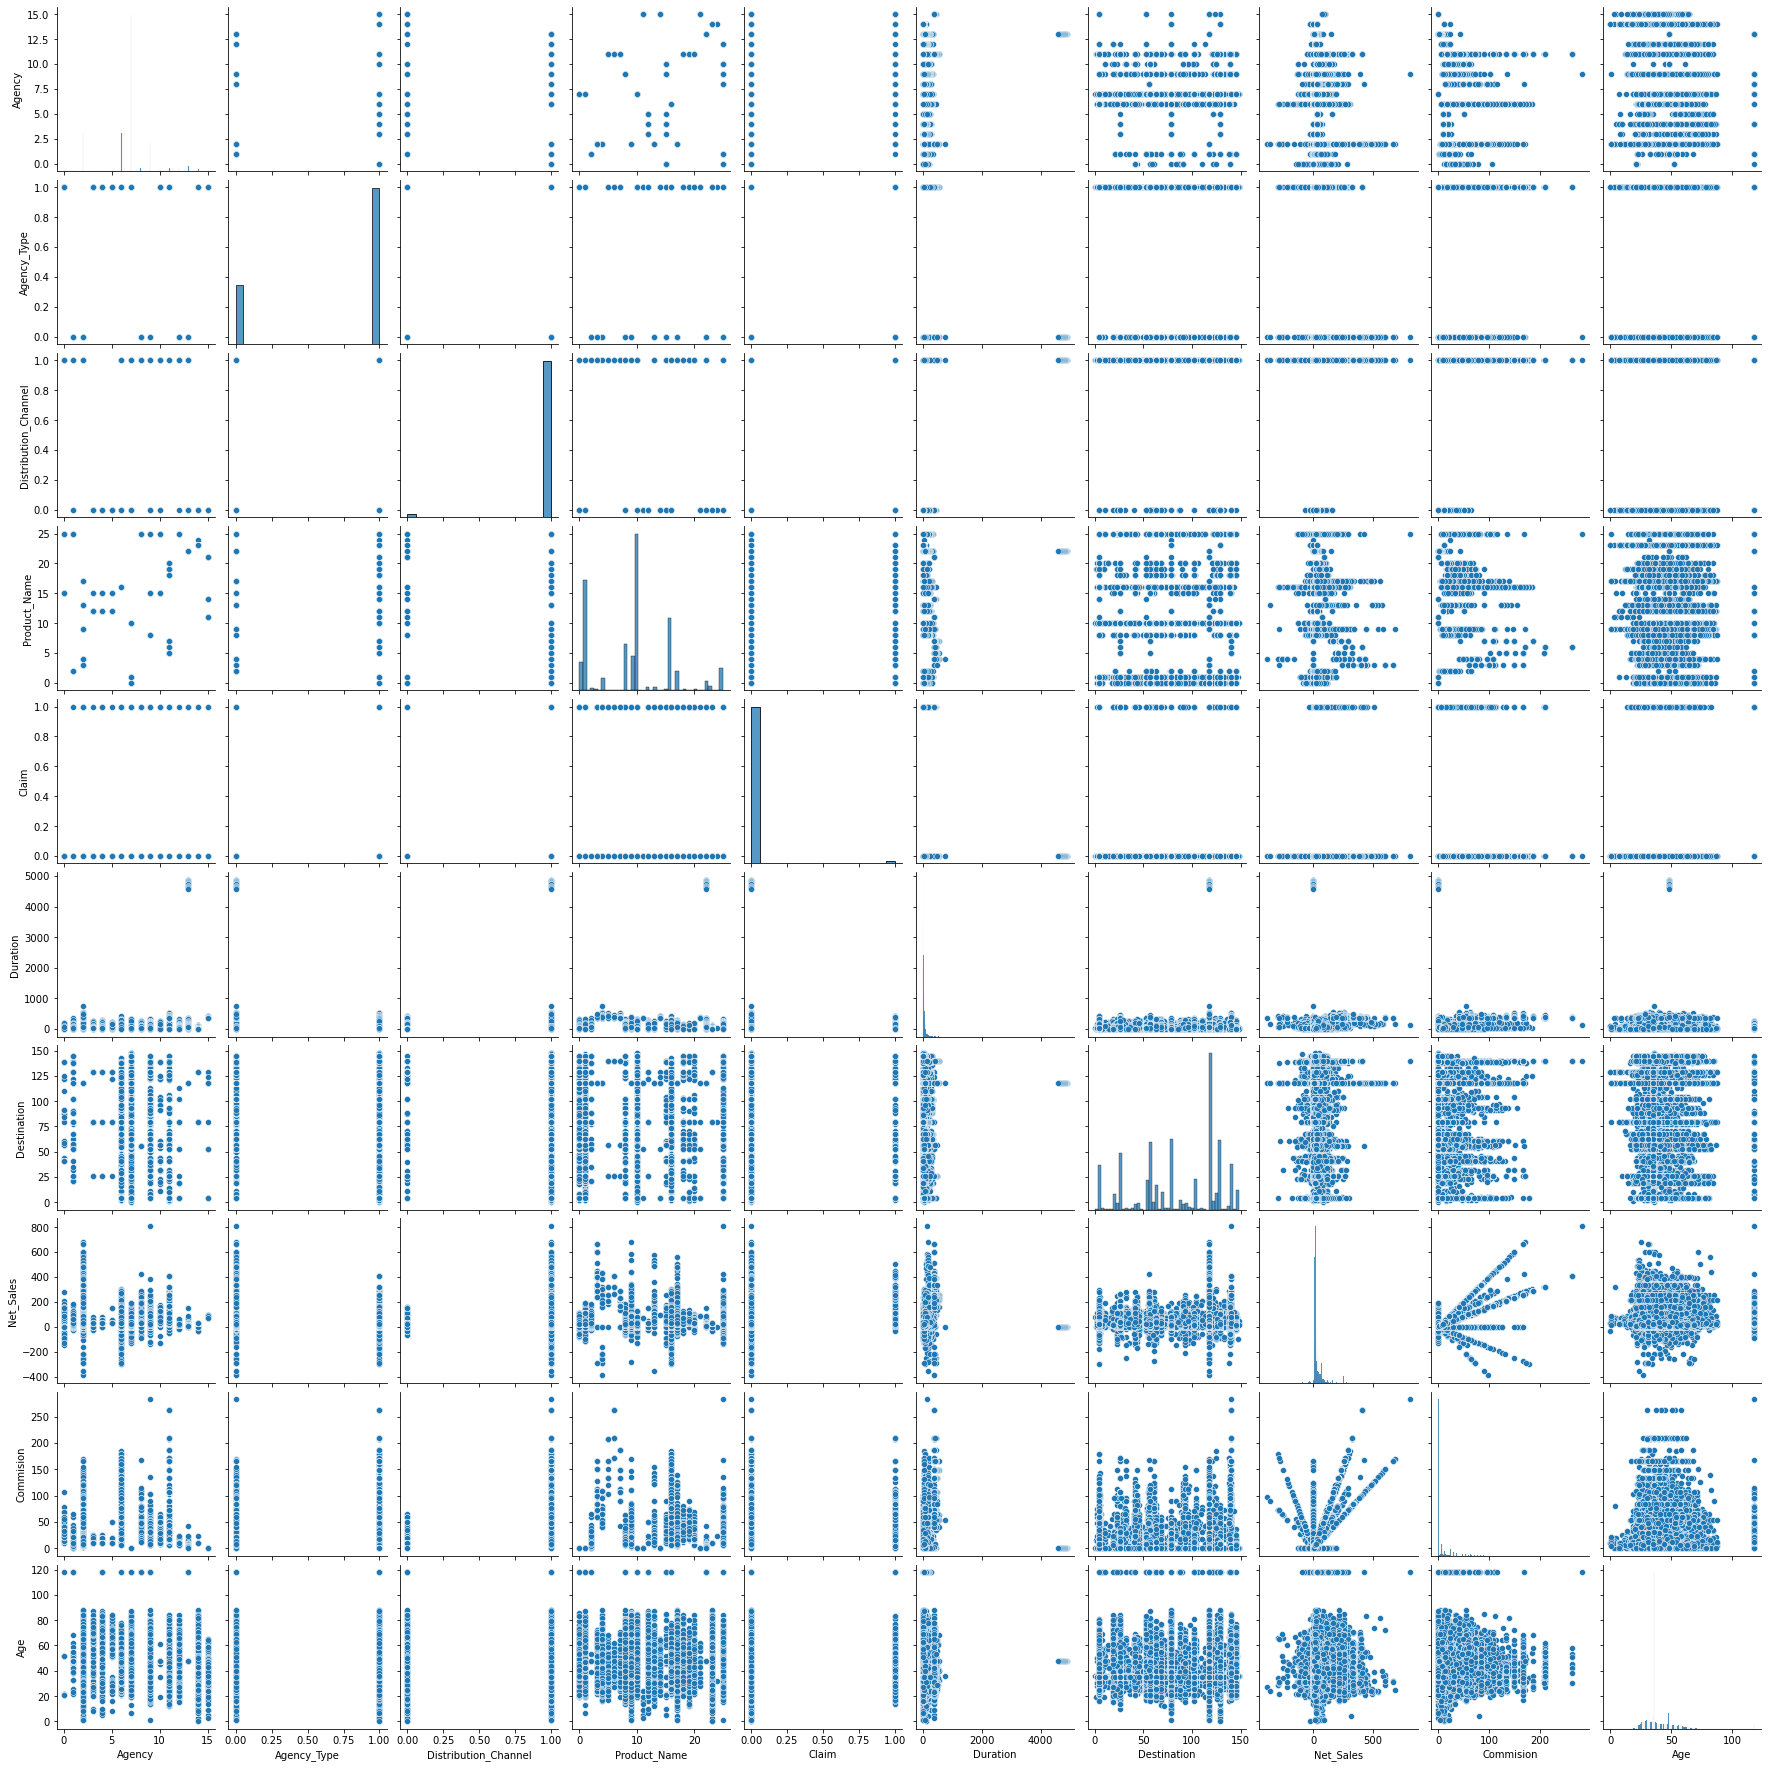

In [149]:
plt.figure(figsize = (15,8))
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Agency'}>,
        <AxesSubplot:title={'center':'Agency_Type'}>,
        <AxesSubplot:title={'center':'Distribution_Channel'}>],
       [<AxesSubplot:title={'center':'Product_Name'}>,
        <AxesSubplot:title={'center':'Claim'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'Destination'}>,
        <AxesSubplot:title={'center':'Net_Sales'}>,
        <AxesSubplot:title={'center':'Commision'}>],
       [<AxesSubplot:title={'center':'Age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

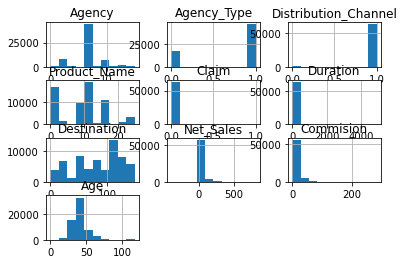

In [150]:
df.hist()

In [151]:
y=df.iloc[:,[-1]]
X=df.drop(y.columns,axis = 1)

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  int32  
 1   Agency_Type           63326 non-null  int32  
 2   Distribution_Channel  63326 non-null  int32  
 3   Product_Name          63326 non-null  int32  
 4   Claim                 63326 non-null  int32  
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  int32  
 7   Net_Sales             63326 non-null  float64
 8   Commision             63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(2), int32(6), int64(2)
memory usage: 3.4 MB


In [153]:
model1 = Pipeline([('clf',LogisticRegression())])
model2 = Pipeline([('clf',KNeighborsClassifier())])

In [154]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=1)

In [155]:
model1.fit(X_train,y_train)

Pipeline(steps=[('clf', LogisticRegression())])

In [156]:
pred1 = model1.predict(X_test)
pred1

array([ 36,  36, 118, ...,  31,  36,  36], dtype=int64)

In [157]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         8
          19       0.00      0.00      0.00        17
          20       0.00      0.00      0.00        39
          21       0.00      0.00      0.00        63
          22       0.00      0.00      0.00        95
          23       0.00    

AxesSubplot(0.125,0.125;0.62x0.755)


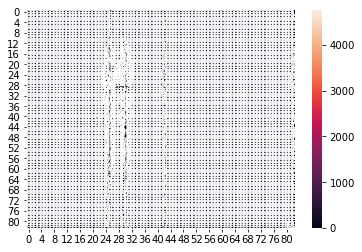

In [158]:
print(sns.heatmap(confusion_matrix(y_test,pred1),annot =True, fmt = '0.5g'))

In [159]:
model2.fit(X_train,y_train)

Pipeline(steps=[('clf', KNeighborsClassifier())])

In [160]:
pred2 = model2.predict(X_test)
pred2

array([ 36,  36, 118, ...,  31,  22,  33], dtype=int64)

In [161]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         6
          18       0.06    

AxesSubplot(0.125,0.125;0.62x0.755)


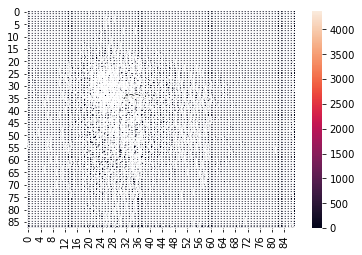

In [162]:
print(sns.heatmap(confusion_matrix(y_test,pred2),annot =True, fmt = '0.5g'))

In [163]:
model3 = SVC()
model3.fit(X_train,y_train)

SVC()

In [164]:
pred3 = model3.predict(X_test)
pred3

array([ 36,  36, 118, ...,  31,  31,  36], dtype=int64)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         8
          19       0.00      0.00      0.00        17
          20       0.00      0.00      0.00        39
          21       0.00      0.00      0.00        63
          22       0.00      0.00      0.00        95
          23       0.00    

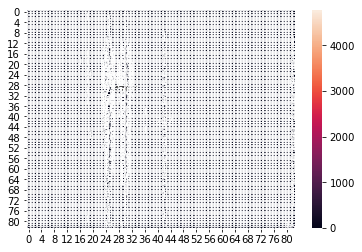

In [165]:
print(classification_report(y_test,pred3))
print(sns.heatmap(confusion_matrix(y_test,pred3), annot = True, fmt = '0.5g'))

In [166]:
model4 = BernoulliNB()
model4.fit(X_train,y_train)

BernoulliNB()

In [167]:
pred4 = model4.predict(X_test)
pred4

array([36, 36, 48, ..., 31, 48, 48], dtype=int64)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         6
          18       0.00      0.00      0.00         8
          19       0.00      0.00      0.00        17
          20       0.00      0.00      0.00        39
          21       0.00      0.00      0.00        63
          22       0.71      0.11      0.18        95
          23       0.00    

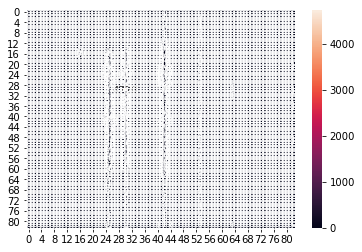

In [168]:
print(classification_report(y_test,pred4))
print(sns.heatmap(confusion_matrix(y_test,pred4), annot = True, fmt = '0.5g'))